<span style="color:blue">

## ■ "Daum" site에서 News Data를 수집한 후 worldcloud 그리기
    
</span>

In [1]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')


## (1) 해당 사이트 탐색 단계

###  ■ Daum 검색창에서 '인공지능'  입력 후 뉴스 페이지로 이동 - 해당 url 을 복사해서 url 변수에  insert

In [2]:

url ='https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5'

req = requests.get(url)    # 해당 페이지를 가져옴

page = BeautifulSoup(req.text , 'html.parser')

print(page)



<!DOCTYPE doctype html>

<html class="unix unknown " lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="인공지능 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5" property="og:url"/>
<meta content="Daum 검색에서 인공지능에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>인공지능 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search

### ▶ 검색 데이터의 headline 을 추출한다.

#### -  F12 (검사 모드) 누른 후 해당 소스의 태그 id 혹은 class 를 찾는다.

In [3]:

titles = page.find_all(attrs='f_link_b')

print(titles)


[<a class="f_link_b" href="http://v.media.daum.net/v/20210427090038622?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26o7fdjZghVm3_Hivx&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16Elf9uX5H6T5xXvQV&amp;e3=0&amp;ext=dsid=26o7fdjZghVm3_Hivx", event, {"cpid": {"value": "16Elf9uX5H6T5xXvQV"}});' target="_blank">단국대, 학생들에게 <b>인공지능</b> 비서 제공</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427143716599?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26g3PhC_cBxrjcxARM&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16akMkKFDu6n8GTzZr&amp;e3=0&amp;ext=dsid=26g3PhC_cBxrjcxARM", event, {"cpid": {"value": "16akMkKFDu6n8GTzZr"}});' target="_blank">단국대, 국내 최초 <b>인공지능</b> 학사지원 시스템 운영</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427101327037?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26yhzUTyBOuVU6T4j2&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16JfL24RCJKYboAM86&amp;e3=0&amp;ext=dsid=26yhzUTyBOuVU6T4j2", event, {"cpid": {"value": "16JfL24RCJKYboAM86"}});' target="_blank">빅데이터 <b>인공지능<

### ▶ 검색된 title의 크기를 확인한다.

In [4]:
print(len(titles))

10


### ▶ 검색된 title의 각각을 프린트 한다.

In [5]:

for title in titles :
    print(title.text)
    print()



단국대, 학생들에게 인공지능 비서 제공

단국대, 국내 최초 인공지능 학사지원 시스템 운영

빅데이터 인공지능, 신병 전투복·운동복 만족도 높였다

인천시, 인공지능 덕분에..방역 역할 톡톡

아이반, 자작곡 '인공지능' 오디오 티저 공개

'인공지능 투자' 파운트, 적립식 투자자 70% 2030

삼성전자, 인공지능 청소기 '비스포크 제트 봇 AI' 출시

대전만의 인공지능 교육 문화를 누리다!

인천시, 인공지능(AI) 도입 코로나19 돌봄전화 서비스

호남대학교, 인공지능 신기술 릴레이 특강



## (2) 본격 스크래핑 단계 


### ▶ 첫 페이지부터 원하는 페이지 까지 뉴스 헤드라인울 스크래핑하는 함수 정의

In [6]:
# 해드라인 검색 및 추출 함수를 정의
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter(매개변수) 로 받음
# 파이썬은 매개변수가 여러개 인 경우 뒤의 매개 변수부터 디폴트값을 가질 수 있음 

title_list = []

def web_scraping(keyword, end, start = 1):    # 시작 페이지의 default 값은 1 (즉, 첫 페이지 부터 시작) 
    while 1:

        if start > end :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={}&p={}'.format(keyword,start)

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')

        titles = page.find_all(attrs='f_link_b')     # 헤드라인 기사를 가져옴 
        
        print(titles)       # 추출한 헤드라인을 확인 (10개)

        for one in titles:
            title_list.append(one.text)
            
        start += 1

        

### ▶ 위 함수를 호출

In [7]:
# 검색어를 입력 받음 


keyword = input('검색어를 입력하세요 : ')
print()

end_page = 10

web_scraping(keyword, end_page)       # 10 페이지 까지 스크래핑을 해온다.


검색어를 입력하세요 : 인공지능

[<a class="f_link_b" href="http://v.media.daum.net/v/20210427090038622?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26o7fdjZghVm3_Hivx&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16Elf9uX5H6T5xXvQV&amp;e3=0&amp;ext=dsid=26o7fdjZghVm3_Hivx", event, {"cpid": {"value": "16Elf9uX5H6T5xXvQV"}});' target="_blank">단국대, 학생들에게 <b>인공지능</b> 비서 제공</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427143716599?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26g3PhC_cBxrjcxARM&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16akMkKFDu6n8GTzZr&amp;e3=0&amp;ext=dsid=26g3PhC_cBxrjcxARM", event, {"cpid": {"value": "16akMkKFDu6n8GTzZr"}});' target="_blank">단국대, 국내 최초 <b>인공지능</b> 학사지원 시스템 운영</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210427101327037?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26yhzUTyBOuVU6T4j2&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16JfL24RCJKYboAM86&amp;e3=0&amp;ext=dsid=26yhzUTyBOuVU6T4j2", event, {"cpid": {"value": "16JfL24RCJKYboAM86"}});' target="_b

[<a class="f_link_b" href="http://v.media.daum.net/v/20210427104942021?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26JHB3RSvVpNbFcLWl&amp;pg=4&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iegqg-unkCM79rj6&amp;e3=0&amp;ext=dsid=26JHB3RSvVpNbFcLWl", event, {"cpid": {"value": "16iegqg-unkCM79rj6"}});' target="_blank">대우건설-LG전자, <b>인공지능</b> 스마트 단지 구축 협력</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210421135707230?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26sxmWIvJGkzM3-pbJ&amp;pg=4&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16_-rXIov6CN5sdGtY&amp;e3=0&amp;ext=dsid=26sxmWIvJGkzM3-pbJ", event, {"cpid": {"value": "16_-rXIov6CN5sdGtY"}});' target="_blank">LG휘센 에어컨 <b>인공지능</b> '좋아요'</a>, <a class="f_link_b" href="https://cp.news.search.daum.net/p/105536183" onclick='smartLog(this, "dc=NNS&amp;d=26cREKoIunaCnAP9b8&amp;pg=4&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16N-ZtmK4T7c7ekWR1&amp;e3=0&amp;ext=dsid=26cREKoIunaCnAP9b8", event, {"cpid": {"value": "16N-ZtmK4T7c7ekWR1"}});' target="_blank">초중고 <b>인공지능</b> 교육

[<a class="f_link_b" href="http://v.media.daum.net/v/20210418110304845?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26uxEGB8bUSl5IgxQD&amp;pg=7&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26uxEGB8bUSl5IgxQD", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">광주시, <b>인공지능</b> 융합대학 지원 사업 공모</a>, <a class="f_link_b" href="https://cp.news.search.daum.net/p/105527262" onclick='smartLog(this, "dc=NNS&amp;d=26mjUIRMFfsBGok36S&amp;pg=7&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16AmEdTM6JMAs4Vc0J&amp;e3=0&amp;ext=dsid=26mjUIRMFfsBGok36S", event, {"cpid": {"value": "16AmEdTM6JMAs4Vc0J"}});' target="_blank">인하대, <b>인공지능</b> 기술 개발 ‘전진기지’ 구축</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210421153206595?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26T5BFILNmlkwjsAMZ&amp;pg=7&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16qiVyQ2BWuaQtIdU5&amp;e3=0&amp;ext=dsid=26T5BFILNmlkwjsAMZ", event, {"cpid": {"value": "16qiVyQ2BWuaQtIdU5"}});' target="_blank">LG전자 휘센 시스템 에어컨 '

[<a class="f_link_b" href="https://cp.news.search.daum.net/p/105526992" onclick='smartLog(this, "dc=NNS&amp;d=26d4q4_VJMvDQSGYYZ&amp;pg=10&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16qHnYZeND1H7GE1S5&amp;e3=0&amp;ext=dsid=26d4q4_VJMvDQSGYYZ", event, {"cpid": {"value": "16qHnYZeND1H7GE1S5"}});' target="_blank">충남교육청-선문대, <b>인공지능</b> 학생동아리 지원</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210422153926484?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26lpOV8h9knruiPx7U&amp;pg=10&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16xPi3xTTvS9eQchSd&amp;e3=0&amp;ext=dsid=26lpOV8h9knruiPx7U", event, {"cpid": {"value": "16xPi3xTTvS9eQchSd"}});' target="_blank">EU, <b>인공지능</b> 규제안 공개</a>, <a class="f_link_b" href="http://v.media.daum.net/v/20210421111012612?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26yRwIXwBvR9gbygmM&amp;pg=10&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16qBwBPOYF5ZTPFTIy&amp;e3=0&amp;ext=dsid=26yRwIXwBvR9gbygmM", event, {"cpid": {"value": "16qBwBPOYF5ZTPFTIy"}});' target="_blank">LG 휘센 시스템 에어컨, 업계 최초 <b

In [8]:
# 수집해온 헤드라인 갯수를 확인 

print(len(title_list))



100


## (3) 데이터 분석 단계


### ▶ 형태소 분석

In [9]:
# 형태소 분석 - 분석하는데 약간의 시간이 걸림 

kkma = Kkma()

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)


print(sentences_tag)



[[('단국', 'NNG'), ('대', 'NNG'), (',', 'SP'), ('학생', 'NNG'), ('들', 'XSN'), ('에게', 'JKM'), ('인공지능', 'NNG'), ('비서', 'NNG'), ('제공', 'NNG')], [('단국', 'NNG'), ('대', 'NNG'), (',', 'SP'), ('국내', 'NNG'), ('최초', 'NNG'), ('인공지능', 'NNG'), ('학사', 'NNG'), ('지원', 'NNG'), ('시스템', 'NNG'), ('운영', 'NNG')], [('빅', 'NNG'), ('데이터', 'NNG'), ('인공지능', 'NNG'), (',', 'SP'), ('신병', 'NNG'), ('전투복', 'NNG'), ('·', 'SP'), ('운동복', 'NNG'), ('만족도', 'NNG'), ('높이', 'VV'), ('었', 'EPT'), ('다', 'EFN')], [('인천시', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('덕분', 'NNG'), ('에', 'JKM'), ('..', 'SW'), ('방', 'NNG'), ('역', 'NNG'), ('역할', 'NNG'), ('톡톡', 'MAG')], [('아이', 'NNG'), ('반', 'NNG'), (',', 'SP'), ('자', 'NNG'), ('작곡', 'NNG'), ("'", 'SS'), ('인공지능', 'NNG'), ("'", 'SS'), ('오디오', 'NNG'), ('티', 'NNG'), ('저', 'MDT'), ('공개', 'NNG')], [("'", 'SS'), ('인공지능', 'NNG'), ('투자', 'NNG'), ("'", 'SS'), ('파', 'VV'), ('아', 'ECS'), ('운', 'NNG'), ('틀', 'VV'), (',', 'SP'), ('적립', 'NNG'), ('식', 'NNG'), ('투자자', 'NNG'), ('70', 'NR'), ('%', 'SW'), ('2030', '

### ▶ 명사 추출

In [12]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NNG']:               # okt = Okt() 인 경우  if tag in ['Noun']:
            noun_list.append(word)
            
print(noun_list)


['단국', '대', '학생', '인공지능', '비서', '제공', '단국', '대', '국내', '최초', '인공지능', '학사', '지원', '시스템', '운영', '빅', '데이터', '인공지능', '신병', '전투복', '운동복', '만족도', '인천시', '인공지능', '덕분', '방', '역', '역할', '아이', '반', '자', '작곡', '인공지능', '오디오', '티', '공개', '인공지능', '투자', '운', '적립', '식', '투자자', '삼성전자', '인공지능', '청소기', '포크', '제트', '출시', '전만', '인공지능', '교육', '문화', '인천시', '인공지능', '도입', '코로나', '봄', '전화', '서비스', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '인', '하대', '인천', '최초', '인공지능', '특화', '연구', '교육', '기관', '인공지능', '협력', '국제', '협의체', '혁신', '상용', '노력', '머니', '브레인', '대화', '형', '인공지능', '기반', '키', '출시', '인공지능', '기술', '지역', '사회', '문제', '해결', '활용', '인천', '인공지능', '융합', '연구', '센터', '설립', '상공', '회의', '소', '서울', '기술', '교육', '센터', '인공지능', '협회', '인공지능', '인력', '현대', '그룹', '인공지능', '기반', '화재', '감시', '시스템', '개발', '포크', '스타일', '인공지능', '로봇', '청소기', '광주', '인공지능', '청년', '협회', '엑센트', '리', '투자', '활성화', '협약', '인공지능', '세상', '청소년', '아이디어', '인공지능', '의', '기술', '핵심', '학습', '데이터', '라벨', '링', '시장', '선도', '광주', '코로나', '방역', '인공지능', '활용', '인', '하대', '인공지능',

### ▶ 두음절 이상 단어만 추출

In [13]:
# 명사 중에서 두음절 단어만 추출 


print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출


print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 



▶ 전체 명사의 수 =  750

▶ 두음절 이상의 명사의 수 =  642

['단국', '학생', '인공지능', '비서', '제공', '단국', '국내', '최초', '인공지능', '학사', '지원', '시스템', '운영', '데이터', '인공지능', '신병', '전투복', '운동복', '만족도', '인천시', '인공지능', '덕분', '역할', '아이', '작곡', '인공지능', '오디오', '공개', '인공지능', '투자', '적립', '투자자', '삼성전자', '인공지능', '청소기', '포크', '제트', '출시', '전만', '인공지능', '교육', '문화', '인천시', '인공지능', '도입', '코로나', '전화', '서비스', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '하대', '인천', '최초', '인공지능', '특화', '연구', '교육', '기관', '인공지능', '협력', '국제', '협의체', '혁신', '상용', '노력', '머니', '브레인', '대화', '인공지능', '기반', '출시', '인공지능', '기술', '지역', '사회', '문제', '해결', '활용', '인천', '인공지능', '융합', '연구', '센터', '설립', '상공', '회의', '서울', '기술', '교육', '센터', '인공지능', '협회', '인공지능', '인력', '현대', '그룹']


### ▶ 추출된 단어들의 출현 횟수를 확인

In [14]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(words)


[('인공지능', 104), ('광주', 10), ('지원', 9), ('교육', 9), ('연구', 8), ('최초', 7), ('하대', 7), ('기반', 7), ('융합', 7), ('대전', 7), ('단국', 6), ('학생', 6), ('아이', 6), ('서비스', 6), ('인천', 6), ('기술', 6), ('센터', 6), ('협약', 6), ('학습', 6), ('교육청', 6), ('산업', 6), ('운영', 5), ('데이터', 5), ('투자', 5), ('협회', 5), ('청년', 5), ('사업', 5), ('업무', 5), ('시스템', 4), ('문화', 4), ('개발', 4), ('선도', 4), ('한컴', 4), ('인텔리', 4), ('미래', 4), ('비서', 3), ('국내', 3), ('학사', 3), ('인천시', 3), ('공개', 3), ('청소기', 3), ('출시', 3), ('코로나', 3), ('특화', 3), ('기관', 3), ('국제', 3), ('활용', 3), ('로봇', 3), ('대학원', 3), ('컴퍼니', 3)]


### ▶ 단어 출현 횟수에 근거하여 word cloude 를 생성

{'인공지능': 104, '광주': 10, '지원': 9, '교육': 9, '연구': 8, '최초': 7, '하대': 7, '기반': 7, '융합': 7, '대전': 7, '단국': 6, '학생': 6, '아이': 6, '서비스': 6, '인천': 6, '기술': 6, '센터': 6, '협약': 6, '학습': 6, '교육청': 6, '산업': 6, '운영': 5, '데이터': 5, '투자': 5, '협회': 5, '청년': 5, '사업': 5, '업무': 5, '시스템': 4, '문화': 4, '개발': 4, '선도': 4, '한컴': 4, '인텔리': 4, '미래': 4, '비서': 3, '국내': 3, '학사': 3, '인천시': 3, '공개': 3, '청소기': 3, '출시': 3, '코로나': 3, '특화': 3, '기관': 3, '국제': 3, '활용': 3, '로봇': 3, '대학원': 3, '컴퍼니': 3}


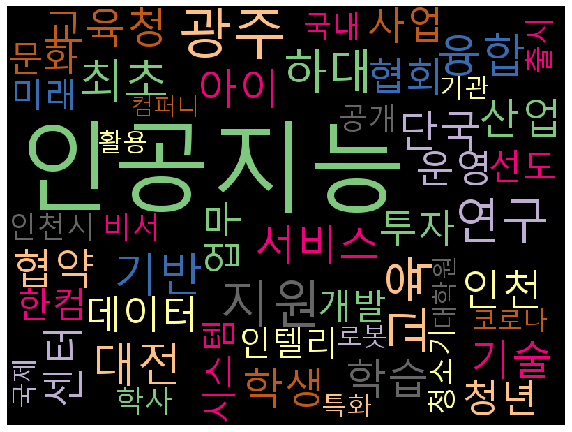

In [15]:
# wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
#                       background_color='white',                   
#                       colormap = 'Accent_r',   
#                       width=800,
#                       height=600)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()


## 수고하셨습니다.  😀